In [1]:
import os, sys
import sys
import numpy as np
from scipy import signal
from  matplotlib import pyplot as plt
import librosa
import IPython.display as ipd
import pandas as pd
sys.path.append('..')
import libfmp.b
import libfmp.c2
import libfmp.c6

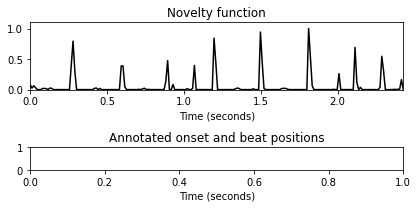

In [38]:
fn_wav = 'ovb85.wav'

x, Fs = librosa.load(fn_wav)
x_duration = len(x)/Fs
nov, Fs_nov = libfmp.c6.compute_novelty_spectrum(x, Fs=Fs)

fig, ax = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, figsize=(6, 3))
libfmp.b.plot_signal(nov, Fs_nov, ax=ax[0], color='k', title='Novelty function');
# libfmp.b.plot_annotation_line(ann, ax=ax[1], label_keys=label_keys,
                    # time_min=0, time_max=x_duration)
ax[1].set_title('Annotated onset and beat positions')
ax[1].set_xlabel('Time (seconds)')

plt.tight_layout()

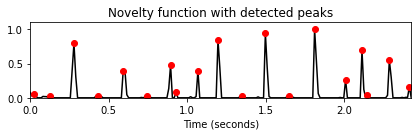

/var/folders/wn/fhcj6_9d2qb5d0pw_xw20ky80000gn/T/ipykernel_2058/3003695592.py:11: FutureWarning: Pass times=[0.02321995 0.12770975 0.27863946 0.42956916 0.59210884 0.74303855
 0.89396825 0.92879819 1.06811791 1.19582766 1.34675737 1.49768707
 1.64861678 1.81115646 2.00852608 2.11301587 2.1478458  2.28716553
 2.41487528] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  x_peaks = librosa.clicks(peaks_sec, sr=Fs, click_freq=1000, length=len(x))


In [39]:
peaks, properties = signal.find_peaks(nov, prominence=0.02)
T_coef = np.arange(nov.shape[0]) / Fs_nov
peaks_sec = T_coef[peaks]
fig, ax, line = libfmp.b.plot_signal(nov, Fs_nov, color='k', 
                    title='Novelty function with detected peaks')
# libfmp.b.plot_annotation_line(ann, ax=ax, label_keys=label_keys, 
                    # nontime_axis=True, time_min=0, time_max=x_duration)
plt.plot(peaks_sec, nov[peaks], 'ro')
plt.show()

x_peaks = librosa.clicks(peaks_sec, sr=Fs, click_freq=1000, length=len(x))
ipd.display(ipd.Audio(x + x_peaks, rate=Fs))

---

/var/folders/wn/fhcj6_9d2qb5d0pw_xw20ky80000gn/T/ipykernel_2058/3360806176.py:2: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  x, Fs = librosa.load(fn_wav, Fs)


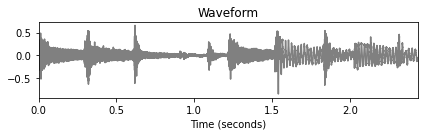

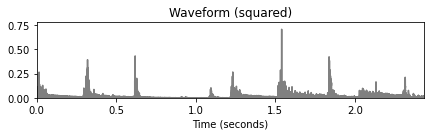

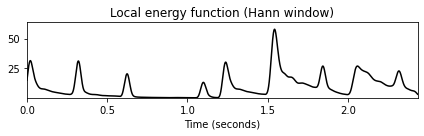

In [40]:
Fs = 22050
x, Fs = librosa.load(fn_wav, Fs) 
x_duration = len(x)/Fs

N = 2048
w = signal.hann(N)

#Calculate local energy
x_square = x**2
energy_local = np.convolve(x_square, w**2, 'same')

libfmp.b.plot_signal(x, Fs, title='Waveform')
libfmp.b.plot_signal(x_square, Fs, title='Waveform (squared)')
fig, ax, line = libfmp.b.plot_signal(energy_local, Fs, color='k', 
                    title='Local energy function (Hann window)')
# libfmp.b.plot_annotation_line(ann, ax=ax, label_keys=label_keys,
#                     nontime_axis=True, time_min=0, time_max=x_duration);
plt.tight_layout()

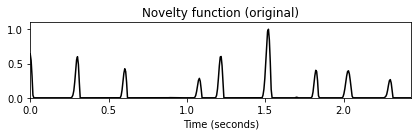

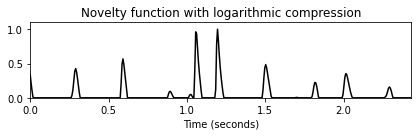

In [44]:
def compute_novelty_energy(x, Fs=1, N=2048, H=128, gamma=10.0, norm=True):
    """Compute energy-based novelty function

    Notebook: C6/C6S1_NoveltyEnergy.ipynb

    Args:
        x (np.ndarray): Signal
        Fs (scalar): Sampling rate (Default value = 1)
        N (int): Window size (Default value = 2048)
        H (int): Hop size (Default value = 128)
        gamma (float): Parameter for logarithmic compression (Default value = 10.0)
        norm (bool): Apply max norm (if norm==True) (Default value = True)

    Returns:
        novelty_energy (np.ndarray): Energy-based novelty function
        Fs_feature (scalar): Feature rate
    """
    # x_power = x**2
    w = signal.hann(N)
    Fs_feature = Fs / H
    energy_local = np.convolve(x**2, w**2, 'same')
    energy_local = energy_local[::H]
    if gamma is not None:
        energy_local = np.log(1 + gamma * energy_local)
    energy_local_diff = np.diff(energy_local)
    energy_local_diff = np.concatenate((energy_local_diff, np.array([0])))
    novelty_energy = np.copy(energy_local_diff)
    novelty_energy[energy_local_diff < 0] = 0
    if norm:
        max_value = max(novelty_energy)
        if max_value > 0:
            novelty_energy = novelty_energy / max_value
    return novelty_energy, Fs_feature

N = 2048
H = 128
nov_1, Fs_nov = compute_novelty_energy(x, Fs=Fs, N=N, H=H, gamma=None)
nov_2, Fs_nov = compute_novelty_energy(x, Fs=Fs, N=N, H=H, gamma=1000)

fig, ax, line = libfmp.b.plot_signal(nov_1, Fs=Fs_nov, color='k', 
                    title='Novelty function (original)')
# libfmp.b.plot_annotation_line(ann, ax=ax, label_keys=label_keys,
                    # nontime_axis=True, time_min=0, time_max=x_duration);
fig, ax, line = libfmp.b.plot_signal(nov_2, Fs=Fs_nov, color='k',
                    title='Novelty function with logarithmic compression')
# libfmp.b.plot_annotation_line(ann, ax=ax, label_keys=label_keys,
                    # nontime_axis=True, time_min=0, time_max=x_duration);

----

/var/folders/wn/fhcj6_9d2qb5d0pw_xw20ky80000gn/T/ipykernel_2058/3180358735.py:3: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  y, sr = librosa.load(fn_wav, sr)


(None,
 [<AxesSubplot:title={'center':'$\\gamma = 100$'}, xlabel='Time (seconds)', ylabel='Frequency (Hz)'>,
  <AxesSubplot:>],
 <matplotlib.image.AxesImage at 0x28ae78220>)

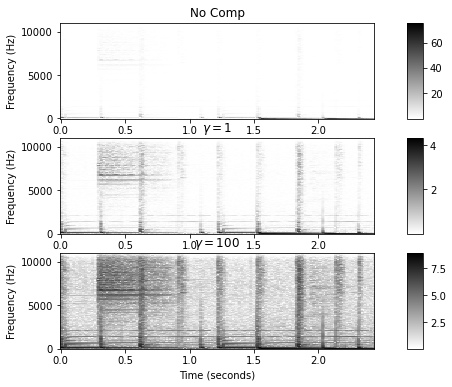

In [41]:
fn_wav = 'ovb85.wav'
sr = 22050
y, sr = librosa.load(fn_wav, sr)
duration = len(y)/sr

N, H = 1024, 256

X = librosa.stft(y, n_fft=N, hop_length=H, win_length=N, window='hanning')

fig, ax = plt.subplots(3,2, gridspec_kw={'width_ratios' : [1, 0.05], \
    'height_ratios' : [1,1,1]}, figsize=(6.5, 6))

Y = np.abs(X)
libfmp.b.plot_matrix(Y, Fs=sr/H, Fs_F=N/sr, ax=[ax[0,0], ax[0,1]], title='No Comp')

gamma = 1
Y = np.log(1 + gamma * np.abs(X))
libfmp.b.plot_matrix(Y, Fs=sr/H, Fs_F=N/sr, ax=[ax[1,0], ax[1,1]], title='$\gamma = %0.0f$'%gamma)

gamma = 100
Y = np.log(1 + gamma * np.abs(X))
libfmp.b.plot_matrix(Y, Fs=sr/H, Fs_F=N/sr, ax=[ax[2,0], ax[2,1]], title='$\gamma = %0.0f$'%gamma)


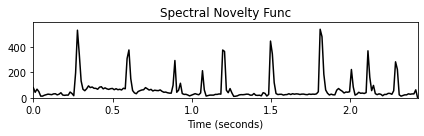

In [42]:
gamma = 10
Y = np.log(1 + gamma * np.abs(X))

Y_diff = np.diff(Y, n=1)
Y_diff[Y_diff < 0 ] = 0

nov = np.sum(Y_diff, axis=0)
nov = np.concatenate((nov, np.array([0])))
sr_nov = sr/H

fig, ax, line = libfmp.b.plot_signal(nov, sr_nov, color='k', title='Spectral Novelty Func')
# libfmp.b.plot_annotation_line(a)


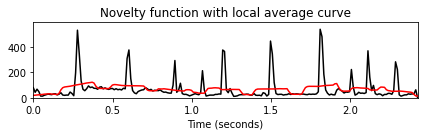

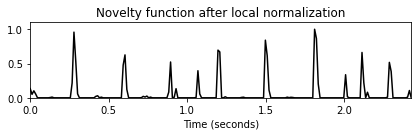

In [43]:
# @jit(nopython=True)
def compute_local_average(x, M):
    """Compute local average of signal

    Notebook: C6/C6S1_NoveltySpectral.ipynb

    Args:
        x (np.ndarray): Signal
        M (int): Determines size (2M+1) in samples of centric window  used for local average

    Returns:
        local_average (np.ndarray): Local average signal
    """
    L = len(x)
    local_average = np.zeros(L)
    for m in range(L):
        a = max(m - M, 0)
        b = min(m + M + 1, L)
        local_average[m] = (1 / (2 * M + 1)) * np.sum(x[a:b])
    return local_average

M_sec = 0.1
M = int(np.ceil(M_sec * sr_nov))

gamma = 10
Y = np.log(1 + gamma * np.abs(X))

Y_diff = np.diff(Y, n=1)
Y_diff[Y_diff < 0 ] = 0

nov = np.sum(Y_diff, axis=0)
nov = np.concatenate((nov, np.array([0])))

local_average = compute_local_average(nov, M)
nov_norm =  nov - local_average
nov_norm[nov_norm<0]=0
nov_norm = nov_norm / max(nov_norm)

libfmp.b.plot_signal(nov, Fs_nov, color='k', 
    title='Novelty function with local average curve');

t_novelty = np.arange(nov.shape[0]) / Fs_nov
plt.plot(t_novelty, local_average, 'r')
plt.tight_layout()

fig, ax, line = libfmp.b.plot_signal(nov_norm, Fs_nov, color='k', 
                    title='Novelty function after local normalization')
# libfmp.b.plot_annotation_line(ann, ax=ax, label_keys=label_keys,
#                     nontime_axis=True, time_min=0, time_max=x_duration);

# %timeit compute_local_average(nov, M)

---


In [2]:
import numpy as np
import os, sys, librosa
from scipy import signal
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import IPython.display as ipd

sys.path.append('..')
import libfmp.b
import libfmp.c6
%matplotlib inline

In [4]:
def plot_beat_grid(B_sec, ax, color='r', linestyle=':', linewidth=1):
    """Plot beat grid (given in seconds) into axis

    Notebook: C6/C6S3_AdaptiveWindowing.ipynb

    Args:
        B_sec: Beat grid
        ax: Axes for plotting
        color: Color of lines (Default value = 'r')
        linestyle: Style of lines (Default value = ':')
        linewidth: Width of lines (Default value = 1)
    """
    for b in B_sec:
        ax.axvline(x=b, color=color, linestyle=linestyle, linewidth=linewidth)

/var/folders/wn/fhcj6_9d2qb5d0pw_xw20ky80000gn/T/ipykernel_2058/754460772.py:4: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  x, Fs = librosa.load(fn_wav, Fs)


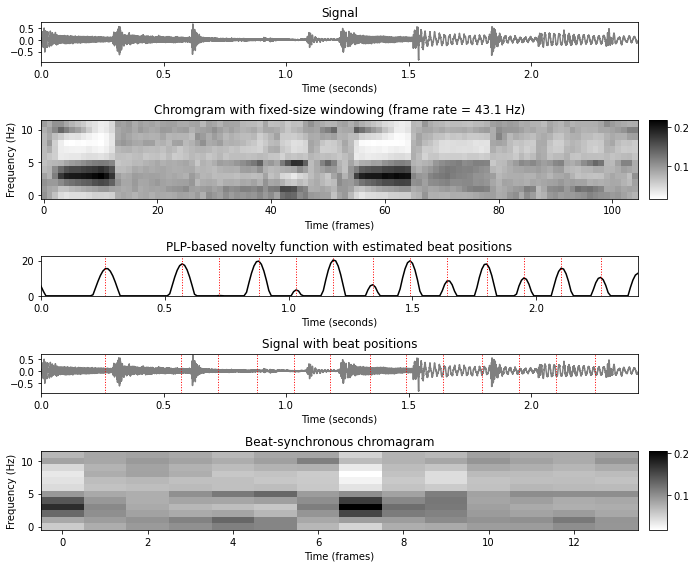

In [22]:
fn_wav = 'OVB85.wav'

Fs = 22050
x, Fs = librosa.load(fn_wav, Fs) 

nov, Fs_nov = libfmp.c6.compute_novelty_spectrum(x, Fs=Fs, N=2048, H=512, 
                                                 gamma=100, M=10, norm=True)
nov, Fs_nov = libfmp.c6.resample_signal(nov, Fs_in=Fs_nov, Fs_out=100)

L_nov = len(nov)
N_nov = 500
H_nov = 10
Theta = np.arange(30, 601)
X, T_coef, F_coef_BPM = libfmp.c6.compute_tempogram_fourier(nov, Fs=Fs_nov, 
                                                            N=500, H=10, Theta=Theta)
nov_PLP = libfmp.c6.compute_plp(X, Fs_nov, L_nov, N_nov, H_nov, Theta)
peaks, properties = signal.find_peaks(nov_PLP, prominence=0.02)
B_adapt_sec = peaks / Fs_nov

N, H = 1024, 512
X = librosa.stft(y=x, n_fft=N, hop_length=H, win_length=N, center=True, window='hanning')
Y = np.abs(X)
C = librosa.feature.chroma_stft(S=Y, sr=Fs, norm=1, hop_length=H, n_fft=N)
B_fix_frame = (B_adapt_sec*Fs/H).astype(int)
C_adapt = librosa.util.sync(C, B_fix_frame, aggregate=np.mean)

# Visualization
fig, ax = plt.subplots(5, 2, gridspec_kw={'width_ratios': [1, 0.03], 
                                          'height_ratios': [1, 2, 1, 1, 2]}, figsize=(10,8)) 

libfmp.b.plot_signal(x, Fs, ax=ax[0,0], title='Signal')
ax[0,1].set_axis_off()
    
libfmp.b.plot_matrix(C, ax=[ax[1,0], ax[1,1]], xlabel='Time (frames)', 
                     title='Chromgram with fixed-size windowing (frame rate = %0.1f Hz)'%(Fs/H))

libfmp.b.plot_signal(nov_PLP, Fs_nov, color='k', ax=ax[2,0],
                    title='PLP-based novelty function with estimated beat positions')
ax[2,1].set_axis_off()
plot_beat_grid(B_adapt_sec, ax[2,0])

libfmp.b.plot_signal(x, Fs, ax=ax[3,0],
                    title='Signal with beat positions')
ax[3,1].set_axis_off()
plot_beat_grid(B_adapt_sec, ax[3,0]) 

libfmp.b.plot_matrix(C_adapt, ax=[ax[4,0], ax[4,1]], xlabel='Time (frames)',
                    title='Beat-synchronous chromagram')

plt.tight_layout()

PeakPick


/var/folders/wn/fhcj6_9d2qb5d0pw_xw20ky80000gn/T/ipykernel_2058/3453788636.py:20: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  x, Fs = librosa.load(fn_wav, Fs)


NameError: name 'ann' is not defined

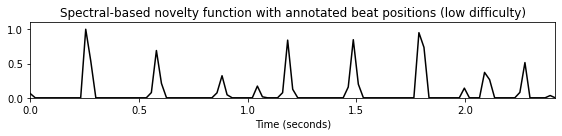

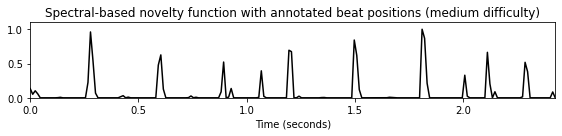

In [24]:
import numpy as np
import os, sys, librosa
from scipy import signal
from scipy.interpolate import interp1d
from scipy.ndimage import filters
from matplotlib import pyplot as plt
import IPython.display as ipd

sys.path.append('..')
import libfmp.b
import libfmp.c2
import libfmp.c6
%matplotlib inline

# fn_ann = os.path.join('..', 'data', 'C6', 'FMP_C6_F07_Shostakovich_Waltz-02-Section_IncreasingTempo.csv')
# ann, label_keys = libfmp.c6.read_annotation_pos(fn_ann, label='onset', header=0)

fn_wav = 'OVB85.wav'
Fs = 22050
x, Fs = librosa.load(fn_wav, Fs)
x_duration = len(x)/Fs

N, H = 2048, 512
gamma = 10
nov, Fs_nov = libfmp.c6.compute_novelty_spectrum(x, Fs=Fs, N=N, H=H, gamma=gamma)
figsize=(8,2)
fig, ax, line = libfmp.b.plot_signal(nov, Fs_nov, figsize=figsize, color='k', 
    title='Spectral-based novelty function with annotated beat positions (low difficulty)');
# libfmp.b.plot_annotation_line(ann, ax=ax, label_keys=label_keys,
                # nontime_axis=True, time_min=0, time_max=x_duration);

N, H = 1024, 256
gamma = 10
nov, Fs_nov = libfmp.c6.compute_novelty_spectrum(x, Fs=Fs, N=N, H=H, gamma=gamma)
figsize=(8,2)
fig, ax, line = libfmp.b.plot_signal(nov, Fs_nov, figsize=figsize, color='k', 
    title='Spectral-based novelty function with annotated beat positions (medium difficulty)');
libfmp.b.plot_annotation_line(ann, ax=ax, label_keys=label_keys,
                nontime_axis=True, time_min=0, time_max=x_duration);

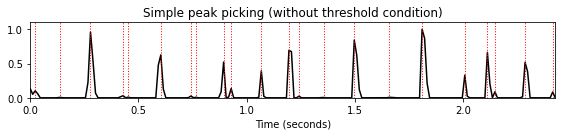

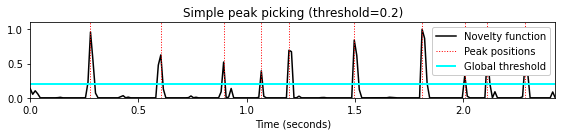

In [25]:
def peak_picking_simple(x, threshold=None):
    """Peak picking strategy looking for positions with increase followed by descrease

    Notebook: C6/C6S1_PeakPicking.ipynb

    Args:
        x (np.ndarray): Input function
        threshold (float): Lower threshold for peak to survive

    Returns:
        peaks (np.ndarray): Array containing peak positions
    """
    peaks = []
    if threshold is None:
        threshold = np.min(x) - 1
    for i in range(1, x.shape[0] - 1):
        if x[i - 1] < x[i] and x[i] > x[i + 1]:
            if x[i] >= threshold:
                peaks.append(i)
    peaks = np.array(peaks)
    return peaks

def plot_function_peak_positions(nov, Fs_nov, peaks, title='', figsize=(8,2)):
    peaks_sec = peaks/Fs_nov
    fig, ax, line = libfmp.b.plot_signal(nov, Fs_nov, figsize=figsize, color='k', title=title);
    plt.vlines(peaks_sec, 0, 1.1, color='r', linestyle=':', linewidth=1);

peaks = peak_picking_simple(nov, threshold=None)
title='Simple peak picking (without threshold condition)'
plot_function_peak_positions(nov, Fs_nov, peaks, title)

threshold = 0.2
peaks = peak_picking_simple(nov, threshold=threshold)
title='Simple peak picking (threshold=%.1f)'%threshold
plot_function_peak_positions(nov, Fs_nov, peaks, title)
plt.hlines(threshold, 0, x_duration, color='cyan', linewidth=2);
plt.legend(['Novelty function',  'Peak positions',  'Global threshold'], 
           loc='upper right', framealpha=1);

/var/folders/wn/fhcj6_9d2qb5d0pw_xw20ky80000gn/T/ipykernel_2058/1761710712.py:18: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  x = filters.gaussian_filter1d(x, sigma=sigma)
/var/folders/wn/fhcj6_9d2qb5d0pw_xw20ky80000gn/T/ipykernel_2058/1761710712.py:19: DeprecationWarning: Please use `median_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  threshold_local = filters.median_filter(x, size=median_len) + offset


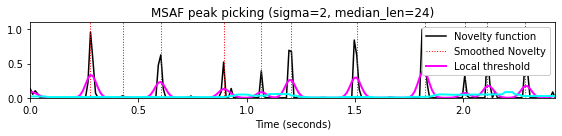

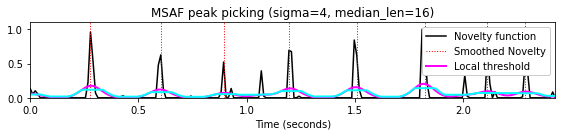

In [26]:
def peak_picking_MSAF(x, median_len=16, offset_rel=0.05, sigma=4.0):
    """Peak picking strategy following MSFA using an adaptive threshold (https://github.com/urinieto/msaf)

    Notebook: C6/C6S1_PeakPicking.ipynb

    Args:
        x (np.ndarray): Input function
        median_len (int): Length of media filter used for adaptive thresholding (Default value = 16)
        offset_rel (float): Additional offset used for adaptive thresholding (Default value = 0.05)
        sigma (float): Variance for Gaussian kernel used for smoothing the novelty function (Default value = 4.0)

    Returns:
        peaks (np.ndarray): Peak positions
        x (np.ndarray): Local threshold
        threshold_local (np.ndarray): Filtered novelty curve
    """
    offset = x.mean() * offset_rel
    x = filters.gaussian_filter1d(x, sigma=sigma)
    threshold_local = filters.median_filter(x, size=median_len) + offset
    peaks = []
    for i in range(1, x.shape[0] - 1):
        if x[i - 1] < x[i] and x[i] > x[i + 1]:
            if x[i] > threshold_local[i]:
                peaks.append(i)
    peaks = np.array(peaks)
    return peaks, x, threshold_local

median_len = 24
sigma = 2
peaks, x_smooth, threshold_local = peak_picking_MSAF(nov, median_len=median_len, 
                                                     offset_rel=0.05, sigma=sigma)
title='MSAF peak picking (sigma=%1.0f, median_len=%2.0f)'%(sigma, median_len)
plot_function_peak_positions(nov, Fs_nov, peaks, title)
t = np.arange(nov.shape[0]) / Fs_nov 
plt.plot(t, x_smooth, color='magenta', linewidth=2);
plt.plot(t, threshold_local, color='cyan', linewidth=2);
plt.legend(['Novelty function', 'Smoothed Novelty', 'Local threshold'], 
           loc='upper right', framealpha=1);

median_len = 16
sigma = 4
peaks, x_smooth, threshold_local = peak_picking_MSAF(nov, median_len=median_len, 
                                                     offset_rel=0.05, sigma=sigma)
title='MSAF peak picking (sigma=%1.0f, median_len=%2.0f)'%(sigma, median_len)
plot_function_peak_positions(nov, Fs_nov, peaks, title)
t = np.arange(nov.shape[0]) / Fs_nov 
plt.plot(t, x_smooth, color='magenta', linewidth=2);
plt.plot(t, threshold_local, color='cyan', linewidth=2);
plt.legend(['Novelty function',  'Smoothed Novelty', 'Local threshold'], 
           loc='upper right', framealpha=1);


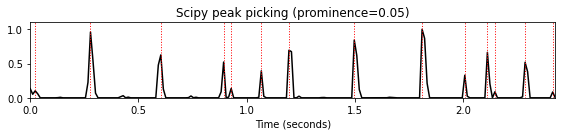

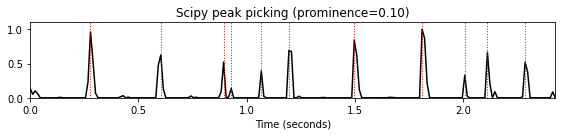

In [27]:
prominence = 0.05
peaks = signal.find_peaks(nov, prominence=prominence)[0]
title='Scipy peak picking (prominence=%.2f)'%prominence
plot_function_peak_positions(nov, Fs_nov, peaks, title)

prominence = 0.1
peaks = signal.find_peaks(nov, prominence=prominence)[0]
title='Scipy peak picking (prominence=%.2f)'%prominence
plot_function_peak_positions(nov, Fs_nov, peaks, title)

/var/folders/wn/fhcj6_9d2qb5d0pw_xw20ky80000gn/T/ipykernel_2058/2116942720.py:8: DeprecationWarning: Please use `median_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  height = filters.median_filter(nov, size=8) + 0.1


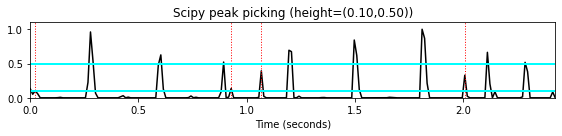

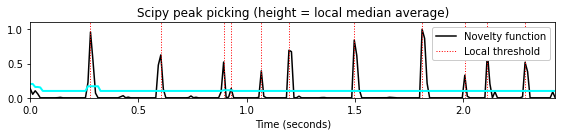

In [28]:
height = (0.1, 0.5)
peaks = signal.find_peaks(nov, height=height)[0]
title='Scipy peak picking (height=(%.2f,%.2f))'%(height[0],height[1])
plot_function_peak_positions(nov, Fs_nov, peaks, title)
plt.hlines(height[0], 0, x_duration, color='cyan', linewidth=2);
plt.hlines(height[1], 0, x_duration, color='cyan', linewidth=2);

height = filters.median_filter(nov, size=8) + 0.1
peaks = signal.find_peaks(nov, height=height)[0]
title='Scipy peak picking (height = local median average)'
plot_function_peak_positions(nov, Fs_nov, peaks, title)
t = np.arange(nov.shape[0]) / Fs_nov 
plt.plot(t, height, color='cyan', linewidth=2);
plt.legend(['Novelty function', 'Local threshold'], 
           loc='upper right', framealpha=1);

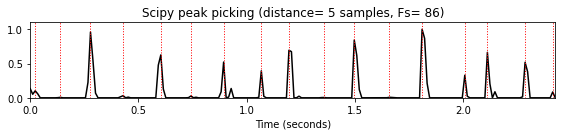

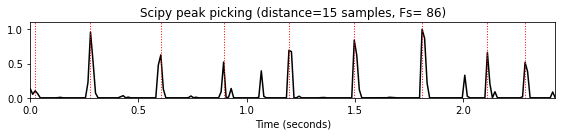

In [29]:
distance = 5
peaks = signal.find_peaks( nov, distance=distance)[0]
title='Scipy peak picking (distance=%2.0f samples, Fs=%3.0f)'%(distance, Fs_nov)
plot_function_peak_positions(nov, Fs_nov, peaks, title)

distance = 15
peaks = signal.find_peaks( nov, distance=distance)[0]
title='Scipy peak picking (distance=%2.0f samples, Fs=%3.0f)'%(distance, Fs_nov)
plot_function_peak_positions(nov, Fs_nov, peaks, title)

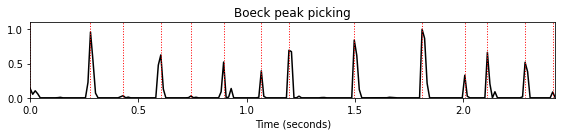

In [30]:
peaks = libfmp.c6.peak_picking_boeck(nov, threshold=0.01, fps=1, 
            include_scores=False, combine=0,
            pre_avg=0.1*Fs_nov, post_avg=0.1*Fs_nov, pre_max=0.1*Fs_nov, post_max=0.1*Fs_nov)
title='Boeck peak picking'
plot_function_peak_positions(nov, Fs_nov, peaks, title)

/var/folders/wn/fhcj6_9d2qb5d0pw_xw20ky80000gn/T/ipykernel_2058/1939539218.py:7: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  nov_smooth = filters.gaussian_filter1d(nov, sigma=2)
/var/folders/wn/fhcj6_9d2qb5d0pw_xw20ky80000gn/T/ipykernel_2058/1761710712.py:18: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  x = filters.gaussian_filter1d(x, sigma=sigma)
/var/folders/wn/fhcj6_9d2qb5d0pw_xw20ky80000gn/T/ipykernel_2058/1761710712.py:19: DeprecationWarning: Please use `median_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  threshold_local = filters.median_filter(x, size=median_len) + offset


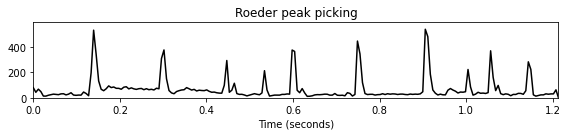

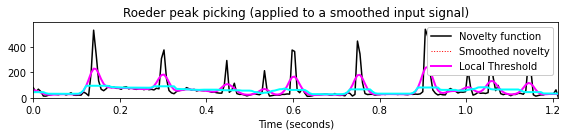

In [51]:
peaks = libfmp.c6.peak_picking_roeder(nov, direction=None, abs_thresh=None, 
                                      rel_thresh=None, descent_thresh=None, 
                                      tmin=None, tmax=None)
title='Roeder peak picking'
plot_function_peak_positions(nov, Fs_nov, peaks, title)

nov_smooth = filters.gaussian_filter1d(nov, sigma=2)

_, nov_smooth, threshold_local = peak_picking_MSAF(nov, median_len=median_len,offset_rel=0.05, sigma=2)

peaks = libfmp.c6.peak_picking_roeder(nov_smooth, direction=None, abs_thresh=None, 
                                      rel_thresh=None, descent_thresh=None, 
                                      tmin=None, tmax=None)
title='Roeder peak picking (applied to a smoothed input signal)'
plot_function_peak_positions(nov, Fs_nov, peaks, title)
t = np.arange(nov.shape[0]) / Fs_nov 
plt.plot(t, nov_smooth, color='magenta', linewidth=2);
plt.plot(t, threshold_local, color='cyan', linewidth=2);
plt.legend(['Novelty function', 'Smoothed novelty', 'Local Threshold'], 
           loc='upper right', framealpha=1);
